In [1]:
# Importing my libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#the two files are total immigration and total emigration over 2014-2023
immigration = pd.read_csv('immigration.csv', header=None, encoding='ISO-8859-1')
immigration.columns = ['Citizenship', 'Immigration']
emigration = pd.read_csv('emigration.csv', header=None, encoding='ISO-8859-1')
emigration.columns = ['Citizenship', 'Emigration']
# Merge the two DataFrames on the 'citizenship' column
merged_df = pd.merge(immigration, emigration, on='Citizenship')

merged_df['Net migration'] = merged_df['Immigration'] - merged_df['Emigration']

# Sort by 'Net migration' in descending order
merged_df = merged_df.sort_values(by='Net migration', ascending=False)

# Drop rows with a 0 or NaN 'Immigration'
merged_df = merged_df[merged_df['Immigration'].notna() & (merged_df['Immigration'] != 0)]

# Reset index
merged_df = merged_df.reset_index(drop=True)



In [3]:
merged_df.head()

,Citizenship,Immigration,Emigration,Net migration
0,Ukraine,54222,19098,35124
1,Syria,32088,5761,26327
2,Romania,57599,32184,25415
3,Poland,45780,28522,17258
4,Germany,39015,26943,12072


In [4]:
merged_df['Percentage stay'] = round((merged_df['Net migration'] / merged_df['Immigration'])*100,1)

# Sort by 'Percentage stay' in descending order
merged_df = merged_df.sort_values(by='Percentage stay', ascending=False)
# Reset index
merged_df = merged_df.reset_index(drop=True)
merged_df.head()


,Citizenship,Immigration,Emigration,Net migration,Percentage stay
0,Tuvalu,1,0,1,100.0
1,Djibouti,6,0,6,100.0
2,Equatorial Guinea,2,0,2,100.0
3,South and central America not stated,1,0,1,100.0
4,Comoros,3,0,3,100.0


In [5]:
# Drop rows with 'Immigration' less than 500
merged_df = merged_df[(merged_df['Immigration'] >= 1000)]
merged_df = merged_df.reset_index(drop=True)
merged_df.tail(20)

,Citizenship,Immigration,Emigration,Net migration,Percentage stay
46,Lithuania,20515,15764,4751,23.2
47,Latvia,6486,5000,1486,22.9
48,France,14979,11847,3132,20.9
49,Belgium,4071,3231,840,20.6
50,Chile,2844,2281,563,19.8
51,China,18541,15013,3528,19.0
52,Finland,5059,4167,892,17.6
53,Austria,2904,2418,486,16.7
54,Switzerland,2708,2267,441,16.3
55,Philippines,11168,9731,1437,12.9


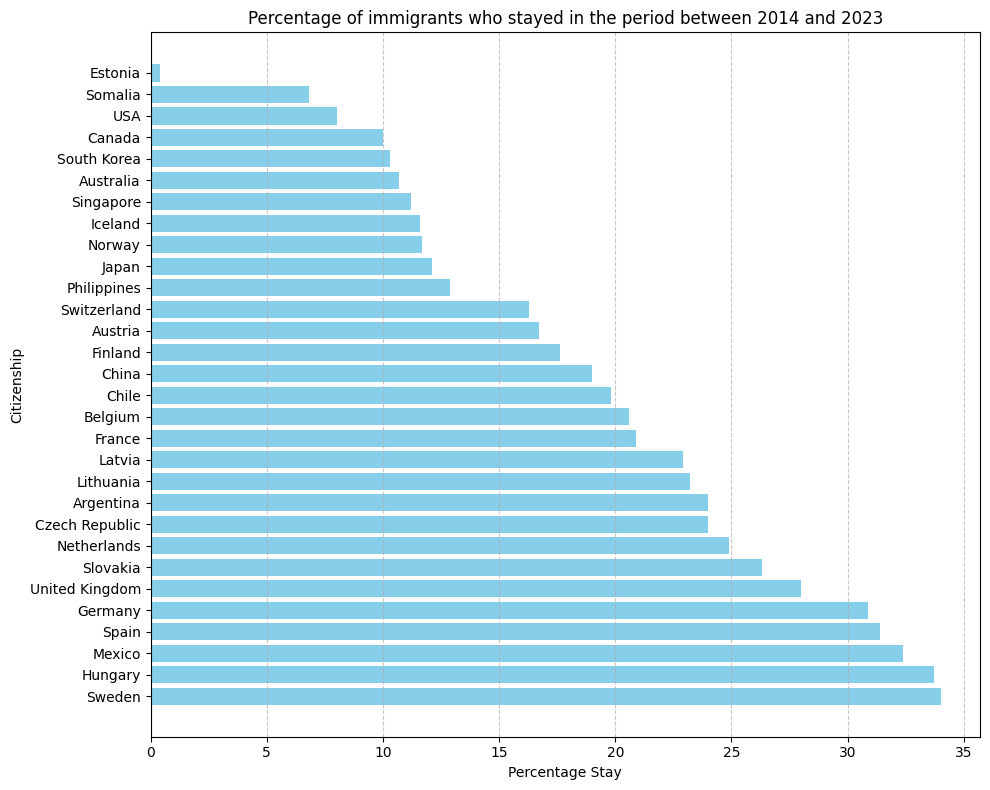

In [6]:
# Sorting to get the bottom 20 values
bottom_30 = merged_df.sort_values(by="Percentage stay").head(30)

# Plotting the barh chart
plt.figure(figsize=(10, 8))
plt.barh(bottom_30["Citizenship"], bottom_30["Percentage stay"], color='skyblue')
plt.xlabel("Percentage Stay")
plt.ylabel("Citizenship")
plt.title("Percentage of immigrants who stayed in the period between 2014 and 2023")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
population_df = pd.read_csv('original pop.csv', header=None, encoding='ISO-8859-1')
population_df.columns = ['Citizenship', 'Original Population']
population_df.head()

,Citizenship,Original Population
0,Albania,241
1,Andorra,0
2,Belarus,512
3,Belgium,1056
4,Bosnia and Herzegovina,10946


In [17]:
# Merge the two DataFrames on the 'citizenship' column
extra_df = pd.merge(merged_df, population_df, on='Citizenship')
extra_df.head()


extra_df['Retention'] = round((extra_df['Net migration'] / extra_df['Original Population']),1)

extra_df.tail()

,Citizenship,Immigration,Emigration,Net migration,Percentage stay,Original Population,Retention
60,Australia,5260,4696,564,10.7,1828,0.3
61,South Korea,2585,2319,266,10.3,520,0.5
62,Canada,5099,4590,509,10.0,1985,0.3
63,Somalia,2040,1902,138,6.8,8574,0.0
64,Estonia,1636,1630,6,0.4,1381,0.0


In [18]:
# Sort by 'Retention' in descending order
extra_df = extra_df.sort_values(by='Retention', ascending=False)
# Reset index
extra_df = extra_df.reset_index(drop=True)

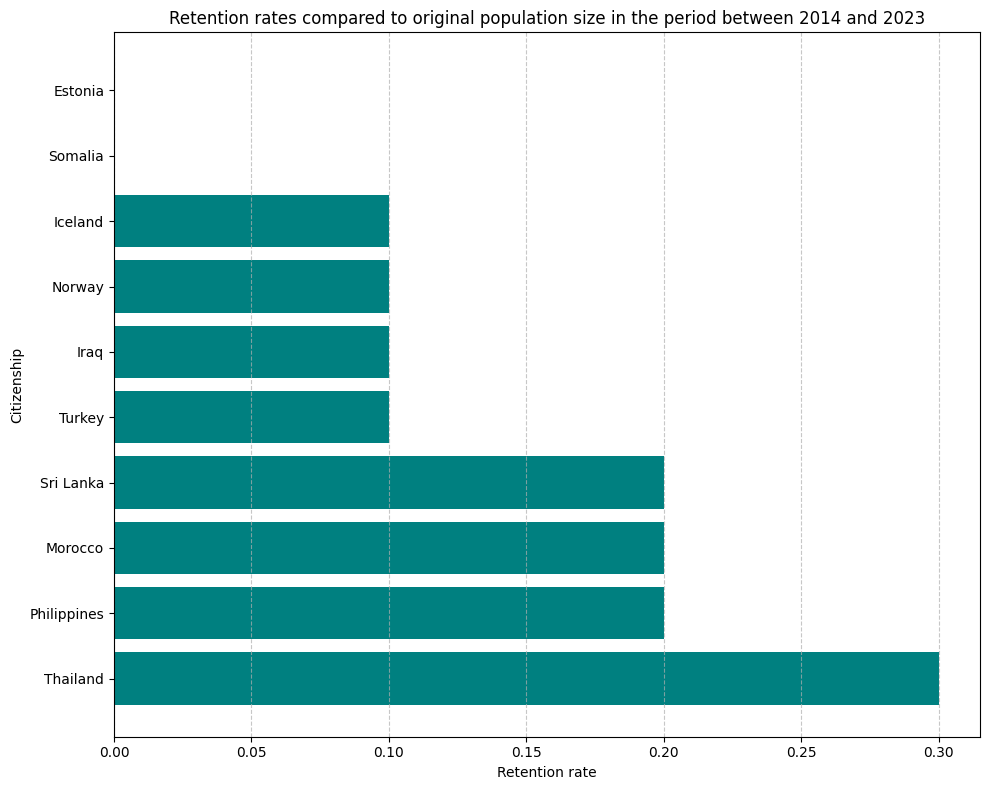

In [19]:
# Sorting to get the bottom 20 values
bottom_10 = extra_df.sort_values(by="Retention").head(10)

# Plotting the barh chart
plt.figure(figsize=(10, 8))
plt.barh(bottom_10["Citizenship"], bottom_10["Retention"], color='teal')
plt.xlabel("Retention rate")
plt.ylabel("Citizenship")
plt.title("Retention rates compared to original population size in the period between 2014 and 2023")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd
import folium
import requests
import json


# URL to the GeoJSON file for country boundaries
geojson_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'

# Fetch GeoJSON data
response = requests.get(geojson_url)
geojson_data = response.json()

# Mapping of country names to align with GeoJSON names
country_name_mapping = {
    'USA': 'United States of America',
    # Add other mappings if necessary
}

# Replace names in the dataframe to align with GeoJSON
extra_df['Citizenship'] = extra_df['Citizenship'].replace(country_name_mapping)

# Initialize a folium map
m = folium.Map(location=[20, 0], zoom_start=2)

# Function to assign color based on Percentage stay
def get_color(percentage):
    if percentage <= 25:
        return 'red'
    elif 25 < percentage <= 50:
        return 'orange'
    elif 50 < percentage <= 75:
        return 'lightgreen'
    else:
        return 'green'

# Add GeoJSON data to the map with color coding
folium.Choropleth(
    geo_data=geojson_data,
    name='choropleth',
    data=extra_df,
    columns=['Citizenship', 'Retention'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Retention rate (%)',
    highlight=True,
    nan_fill_color='white'
).add_to(m)

# Add tooltips for each country
folium.GeoJson(
    geojson_data,
    style_function=lambda x: {'fillColor': 'transparent', 'color': 'black', 'weight': 0.5},
    tooltip=folium.GeoJsonTooltip(fields=['name'], aliases=['Country:'])
).add_to(m)

# Save the map to an HTML file
m.save('percentage_stay_map.html')
m

In [12]:
import pandas as pd
import folium
import requests
import json


# URL to the GeoJSON file for country boundaries
geojson_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'

# Fetch GeoJSON data
response = requests.get(geojson_url)
geojson_data = response.json()

# Mapping of country names to align with GeoJSON names
country_name_mapping = {
    'USA': 'United States of America',
    # Add other mappings if necessary
}

# Replace names in the dataframe to align with GeoJSON
merged_df['Citizenship'] = merged_df['Citizenship'].replace(country_name_mapping)

# Initialize a folium map
m = folium.Map(location=[20, 0], zoom_start=2)

# Function to assign color based on Percentage stay
def get_color(percentage):
    if percentage <= 25:
        return 'red'
    elif 25 < percentage <= 50:
        return 'orange'
    elif 50 < percentage <= 75:
        return 'lightgreen'
    else:
        return 'green'

# Add GeoJSON data to the map with color coding
folium.Choropleth(
    geo_data=geojson_data,
    name='choropleth',
    data=merged_df,
    columns=['Citizenship', 'Percentage stay'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Percentage Stay (%)',
    highlight=True,
    nan_fill_color='white'
).add_to(m)

# Add tooltips for each country
folium.GeoJson(
    geojson_data,
    style_function=lambda x: {'fillColor': 'transparent', 'color': 'black', 'weight': 0.5},
    tooltip=folium.GeoJsonTooltip(fields=['name'], aliases=['Country:'])
).add_to(m)

# Save the map to an HTML file
m.save('percentage_stay_map.html')
m